## Introduction to Gradient Descent

### What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize the cost (or loss) function in various machine learning algorithms. It is an iterative method that starts with an initial set of parameters and adjusts them step-by-step to find the values that minimize the cost function.

### Where is Gradient Descent Used?

Gradient Descent is widely used in:
- **Linear Regression**: To find the line that best fits a set of data points.
- **Logistic Regression**: To find the best parameters for classification problems.
- **Neural Networks**: To adjust the weights and biases in order to reduce the error in predictions.
- **Support Vector Machines (SVMs)**: To optimize the decision boundary.
- **Any Machine Learning Algorithm** that involves optimizing a cost function.

### How Does Gradient Descent Work?

The basic idea of Gradient Descent is to update the parameters of the model iteratively to reduce the cost function. Here is a step-by-step explanation of how it works:

1. **Initialize Parameters**: Start with an initial guess for the parameters.
2. **Compute the Cost**: Calculate the cost function, which measures how well the model with the current parameters fits the data.
3. **Compute the Gradient**: Determine the gradient of the cost function with respect to each parameter (The gradient is a vector of partial derivatives that indicates the direction and rate of the steepest increase in the cost function).
4. **Update Parameters**: Adjust the parameters in the opposite direction of the gradient to reduce the cost. The update rule is:
   $$
   \theta := \theta - \alpha \nabla J(\theta)
   $$
   where:
   - $\theta$ represents the parameters.
   - $\alpha$ is the learning rate, a small positive value that controls the size of the step.
   - $\nabla J(\theta)$ is the gradient of the cost function with respect to the parameters.
5. **Repeat**: Continue the process of computing the cost, computing the gradient, and updating the parameters until convergence (when the cost function stops decreasing significantly).

### Conclusion

Gradient Descent is a foundational algorithm in machine learning and optimization. By iteratively adjusting parameters to minimize a cost function, it enables the training of a wide range of models, from simple linear regressions to complex neural networks. Understanding its principles and variations is crucial for effectively implementing and tuning machine learning models.


## Lets develop the code of how Gradient Descent Works
For this we will use the next arbitrary function: 

$$f(x) = x^2 + \sin(4x)$$

and we want to find its minimum in the region: $-3 < x < 3$. Lets see how this looks like

Text(0.5, 1.0, 'Gradient Descent Example')

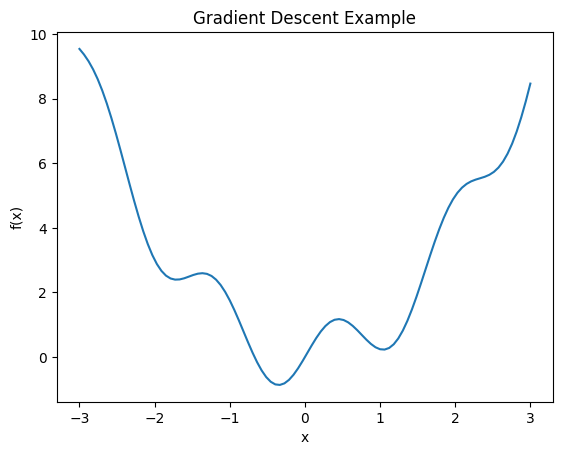

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xrange = np.linspace(-3, 3, 100)

def func(x):
    return x**2 + np.sin(4*x)

f = func(xrange)

plt.plot(xrange, f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Example")

# 1. Initialize parameters and 2. Compute the cost
1. Since we only depend on $x$ this is our only parameter, lets initiate in a random state. 
2. Evaluate $f(x_0)$ 

Text(0.5, 1.0, 'Gradient Descent Example')

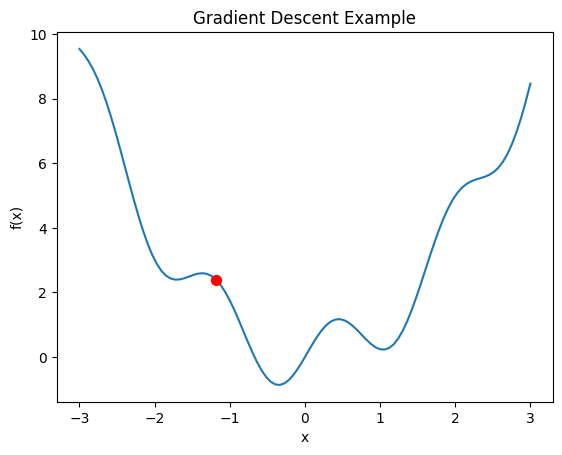

In [2]:
x0 = np.random.random()*6-3
f0 = func(x0)

plt.plot(xrange, f, zorder = 1)
plt.scatter(x0, f0, c = "red", s = 50, zorder = 2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Example")

## 3. Compute the gradient:

For this we will define a small step $dx = 0.01$ to get the gradient.

In [3]:
dx = 0.001
gradient = (f0 - func(x0-dx))/dx
print(f"Gradient: {gradient}")

Gradient: -2.2885049276952785


## 4. Update parameters
To update the parameters we need to define a learning_rate:
$$
   x := x - \alpha \nabla f(x)
$$
we will use the learning rate $\alpha = 0.01$

Text(0.5, 1.0, 'Gradient Descent Example')

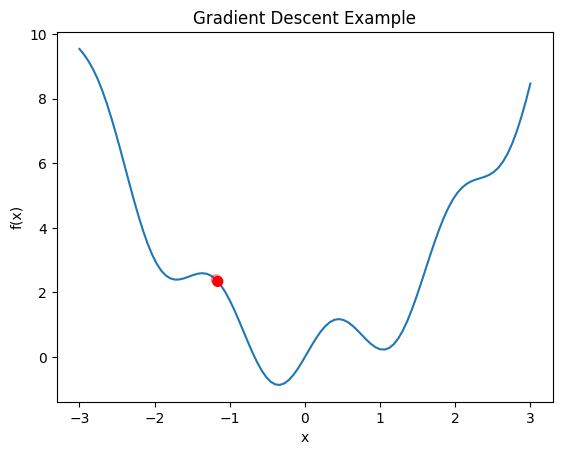

In [4]:
alpha = 0.01
x1 = x0 - alpha*gradient

# Recalculate the value of f(x)
f1 = func(x1)

plt.plot(xrange, f, zorder = 1)
plt.scatter([x0, x1], [f0, f1], c = "red", s = 50, zorder = 2, alpha = [0.3, 1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Example")

## Now we repeat this until we reach a minimum

In [5]:
import time

# Tunable parameter
alpha = 0.01 

def gradient_descent(func, alpha = 0.01, tol = 0.01):

    f_vals = [f0, f1]
    x_vals = [x0, x1]

    while np.abs(f_vals[-1]-f_vals[-2]) > tol:

        # Calculate gradient
        gradient = (func(x_vals[-1]+dx)-f_vals[-1])/dx

        # Update parameters 
        x_new = x_vals[-1] - alpha*gradient
        f_new = func(x_new)

        # Save parameters (this is for animation purpose)
        f_vals.append(f_new)
        x_vals.append(x_new)

    return x_vals, f_vals

xv, fv = gradient_descent(func)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

alpha = 0.5
xv, fv = gradient_descent(func, alpha = alpha, tol = 0.01)

# Use the magic command to enable interactive plotting in Jupyter Notebook
%matplotlib notebook

# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot(xrange, f, zorder=1)
scatter = ax.scatter([], [], color='red', zorder=2, s=50)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# Set axis limits
ax.set_xlim(-3.2, 3.2)
ax.set_ylim(-1, 10)

# Update function for animation
def update(i):
    
    current_x_vals = xv[:(i)]
    current_f_vals = fv[:(i)]
    
    # Update scatter plot data
    scatter.set_offsets(np.c_[current_x_vals, current_f_vals])
    
    # Calculate new opacities for the points
    opacity = np.linspace(0.1, 1, len(current_x_vals))  # Gradually decrease opacity
    
    # Update the face and edge colors to include alpha (opacity)
    colors = np.zeros((len(current_x_vals), 4))
    colors[:, 0] = 1  # Red channel
    colors[:, 3] = opacity  # Alpha channel (opacity)
    
    scatter.set_facecolor(colors)
    scatter.set_edgecolor(colors)
    ax.set_title(f"alpha = {alpha} | Step: {i}")
    return scatter,

# Create animation
ani = FuncAnimation(fig, update, frames=len(xv), interval=250, blit=True)
ani.save("gd_large_step.gif", writer=PillowWriter(fps=4))

<IPython.core.display.Javascript object>

In the 3 gifs creates we can see the limitations and characteristics of the gradient descent.
1. First of all, the learning rate is very important:
    * Too large and we will have too large jumps not getting good approximations.
    * Too small and we will have to wait too long to get the expected solution
    * A good learning rate will find a minimum in a relative optimal time.
2. The gradient descent can be stuck in local minimums instead of finding global minimums.